# **Distance to the nearest MRT station in the Xindian district in Taiwan**

#### Mikail Durrani, Merwise Hamidi, Raymond Li, Ethan Yang

## Introduction


The Mass Rapid Transit (MRT) system in Taiwan stands as asubstantial partt of urban mobility, especially in the densely populated areas of Taipei and New Taipei City. Initiated with the Taipei Metro in 1996, the system is distinguished for its effectiveness in mitigating traffic congestion and boasts over eight million daily riders, underscoring its significance as one of the world's most utilized metro systems (Wikipedia, 2023). Recognized for its reliabilit, convenience, and efficiencyy, the MRT network provides a variety of ticketing options, including the EasyCard and various passes, tailored to enhance the commuting experience for its users (Guide to Taipei, 2023). Notably, a substantial portion of the populace relies on public transit, with over 2 million daily bus users and an MRT (Mass Rapid Transit) system serving millions ("City Profiles: Taipei, Taiwan," n.d.).


Utilising the UCI Real Estate Valuation dataset, our project delves into the pivotal aspect of MRT proximity in Xindian, a district in Taiwan with high-demand for MRTs. Given information on house price, house age and other continuous random variables, we will employ regression to answer predictive questions and construct a thorough analysis of the data itself.

Thus, we posit the question, What distance to the nearest MRT station can you expect in the Xindian district, using Transaction date, House age, Latitude, Longitude, and house price of the unit area?

In [8]:
library(readxl)
library(tidyverse)
library(tidymodels)

install.packages("gt")
library(gt)
install.packages("gtsummary")
library(gtsummary)
install.packages("corrr")
library(corrr)
library(ggplot2)
install.packages("naniar")
library(naniar)
install.packages("reshape2")
library(reshape2)
library(RColorBrewer)
library(repr)

set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Reading and Wrangling

### Importing the data

In [9]:
re_val = read_csv("https://raw.githubusercontent.com/Xer24/Group36Dsci100/main/Data/Real%20estate%20valuation%20data%20set.csv")

head(re_val)

Rows: 414 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): No, X1 transaction date, X2 house age, X3 distance to the nearest M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


After reading the data, we can see that the column names have prefixes that we don't need, and the variable transaction date is not expressed in standard year month format. We may want to create new seperate columns for year and month since we may have to employ them differently during our project.

### Changing the column names & seperating transaction date into year and month

In [10]:
colnames(re_val) = c('No','transaction_date','house_age','dist_nearest_MRT','num_convinient_store','latitude','longitude','house_price_unit_area')

re_val$year = floor(re_val$transaction_date)
date = re_val$transaction_date - re_val$year
re_val$month <- ifelse(date == 0, 12, round(date * 12))
re_val = mutate(re_val, month, year)
head(re_val)

No,transaction_date,house_age,dist_nearest_MRT,num_convinient_store,latitude,longitude,house_price_unit_area,year,month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9,2012,11
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2,2012,11
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3,2013,7
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8,2013,6
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1,2012,10
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1,2012,8


### Splitting the dataset into training set and testing set

In [11]:
re_val_split = initial_split(re_val, prop = 0.75, strata = dist_nearest_MRT)
re_val_train = training(re_val_split)
re_val_test = testing(re_val_split)
glimpse(re_val_train)
glimpse(re_val)

Rows: 310
Columns: 10
$ No                    <dbl> 1, 8, 24, 28, 58, 66, 67, 83, 91, 96, 97, 99, 10…
$ transaction_date      <dbl> 2012.917, 2013.417, 2013.083, 2013.250, 2012.917…
$ house_age             <dbl> 32.0, 20.3, 10.1, 10.4, 3.5, 40.1, 1.0, 13.2, 0.…
$ dist_nearest_MRT      <dbl> 84.87882, 287.60250, 279.17260, 276.44900, 56.47…
$ num_convinient_store  <dbl> 10, 6, 7, 5, 7, 8, 6, 7, 1, 5, 9, 5, 9, 1, 6, 5,…
$ latitude              <dbl> 24.98298, 24.98042, 24.97528, 24.95593, 24.95744…
$ longitude             <dbl> 121.5402, 121.5423, 121.5454, 121.5391, 121.5371…
$ house_price_unit_area <dbl> 37.9, 46.7, 47.9, 33.6, 53.5, 44.3, 50.7, 48.1, …
$ year                  <dbl> 2012, 2013, 2013, 2013, 2012, 2013, 2013, 2013, …
$ month                 <dbl> 11, 5, 1, 3, 11, 5, 12, 1, 10, 11, 5, 5, 5, 10, …
Rows: 414
Columns: 10
$ No                    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ transaction_date      <dbl> 2012.917, 2012.917, 2013.583, 2013.500, 2012.8

We split the data into 75% for training and 25% for testing. We can see that there are 310 observations in re_val_train and 414 observations in re_val dataframe, which gives us approximately 310/414 = 0.75 fraction to be our training data

### Table 0: Missing Values Table

In [12]:
missing = re_val_train |>
  miss_var_summary()
missing

variable,n_miss,pct_miss
<chr>,<int>,<num>
No,0,0
transaction_date,0,0
house_age,0,0
dist_nearest_MRT,0,0
num_convinient_store,0,0
latitude,0,0
longitude,0,0
house_price_unit_area,0,0
year,0,0


There are no missing data! This is because the original dataset on the webpage is already cleaned and tidied before.

### Table 1: Summary Statistics Table

In [44]:
install.packages("IRdisplay")
library(IRdisplay)

Mode = function(x) {
  ux = unique(x)
  ux[which.max(tabulate(match(x,ux)))]
}

tbl <- tbl_summary(
  re_val_train |> select(house_age, num_convinient_store, latitude, longitude, house_price_unit_area),
  statistic = list(
    all_continuous() ~ c("{mean} ({sd})", "{min}","{median},({p25}, {p75})","{max}", "{Mode}"), 
    all_categorical() ~ "{n} / {N} ({p}%)"
  ),
  digits = all_continuous() ~ 2,
  type = list(all_continuous() ~ "continuous2"),
  missing_text = "(Missing)"
)

tbl = tbl |> 
modify_header(label ~ "**Predictors**") |>
modify_caption("**Table 1. Summary Statistics For Predictors**")

re_val_tbl = as_gt(tbl)
gt_html <- gt::as_raw_html(re_val_tbl)

IRdisplay::display_html(gt_html)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false" style="-webkit-font-smoothing: antialiased; -moz-osx-font-smoothing: grayscale; font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji'; display: table; border-collapse: collapse; line-height: normal; margin-left: auto; margin-right: auto; color: #333333; font-size: 16px; font-weight: normal; font-style: normal; background-color: #FFFFFF; width: auto; border-top-style: solid; border-top-width: 2px; border-top-color: #A8A8A8; border-right-style: none; border-right-width: 2px; border-right-color: #D3D3D3; border-bottom-style: solid; border-bottom-width: 2px; border-bottom-color: #A8A8A8; border-left-style: none; border-left-width: 2px; border-left-color: #D3D3D3;" bgcolor="#FFFFFF">
 <!--/html_preserve--> Table 1. Summary Statistics For Predictors <!--html_preserve-->
 
 
 <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="<strong>Predictors</strong>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: left;" bgcolor="#FFFFFF" valign="bottom" align="left"> Predictors 
 <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="<strong>N = 310</strong>" style="border-style: none; color: #333333; background-color: #FFFFFF; font-size: 100%; font-weight: normal; text-transform: inherit; border-left-style: none; border-left-width: 1px; border-left-color: #D3D3D3; border-right-style: none; border-right-width: 1px; border-right-color: #D3D3D3; vertical-align: bottom; padding-top: 5px; padding-bottom: 6px; padding-left: 5px; padding-right: 5px; overflow-x: hidden; text-align: center;" bgcolor="#FFFFFF" valign="bottom" align="center"> N = 310 
 
 
 
 house_age 
 
     Mean (SD) 
 17.71 (11.17) 
     Minimum 
 0.00 
     Median,(IQR) 
 16.20,(9.03, 27.83) 
     Maximum 
 43.80 
     Mode 
 0.00 
 num_convinient_store 
 
     Mean (SD) 
 4.00 (2.96) 
     Minimum 
 0.00 
     Median,(IQR) 
 4.00,(1.00, 6.00) 
     Maximum 
 10.00 
     Mode 
 0.00 
 latitude 
 
     Mean (SD) 
 24.97 (0.01) 
     Minimum 
 24.93 
     Median,(IQR) 
 24.97,(24.96, 24.98) 
     Maximum 
 25.01 
     Mode 
 24.97 
 longitude 
 
     Mean (SD) 
 121.53 (0.02) 
     Minimum 
 121.48 
     Median,(IQR) 
 121.54,(121.53, 121.54) 
     Maximum 
 121.57 
     Mode 
 121.54 
 house_price_unit_area 
 
     Mean (SD) 
 37.40 (13.65) 
     Minimum 
 7.60 
     Median,(IQR) 
 38.25,(26.68, 45.88) 
     Maximum 
 117.50 
     Mode 
 42.00

The summary statistics table gives us a good understanding of the outlook of each variable and the general central tendency. For example, we can see that the newest, and most often house age is 0.00, which means there are lots of newly constructed houses in the area and the mean age is around 18 with a standard deviation of 11.17, which we can tell that this standard deviation is pretty large, which means the house ages deviate a lot from the mean. 

### Table 2: Correlation Table

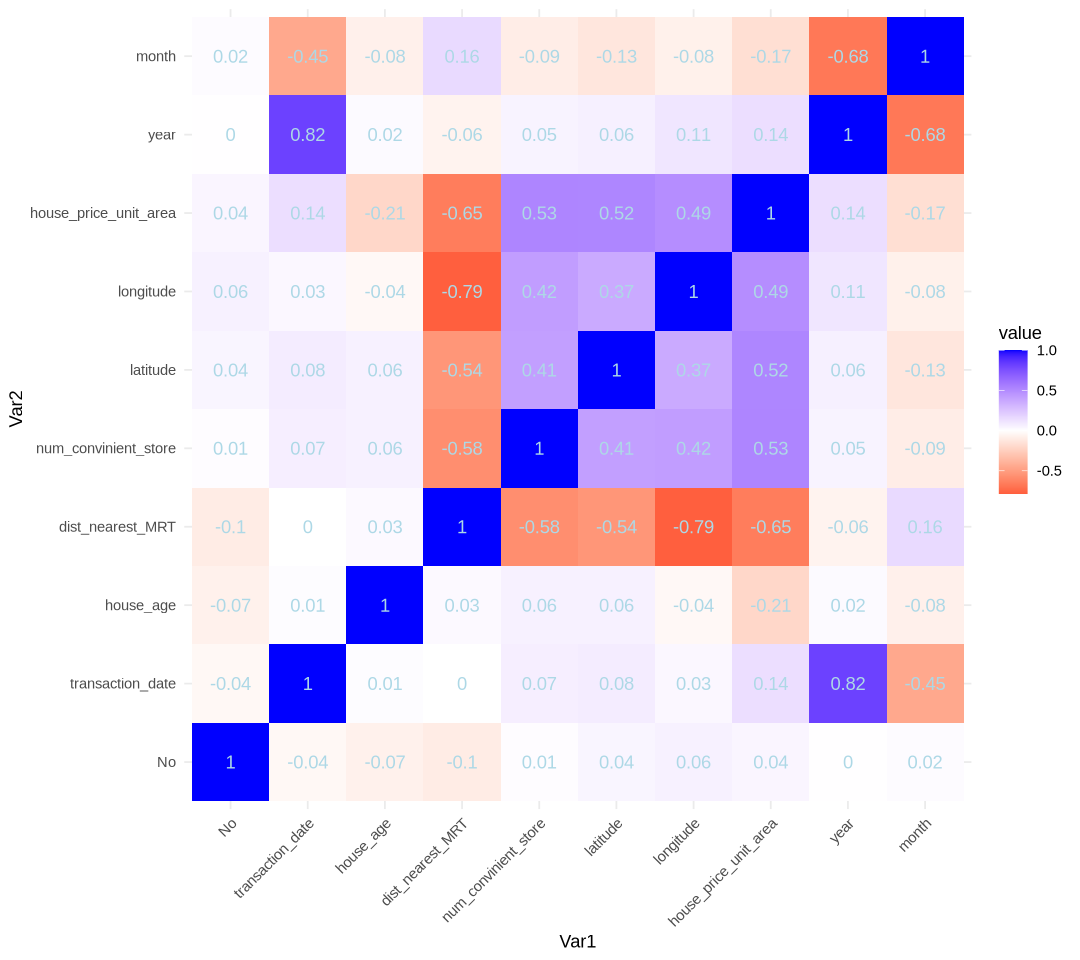

In [36]:
cor_matrix <- cor(re_val_train, use = "complete.obs") 
cor_data <- melt(cor_matrix)

options(repr.plot.height = 8, repr.plot.width = 9)
ggplot(data = cor_data, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() + # Create the tiles
  geom_text(aes(label = round(value, 2)), color = "lightblue") + 
  scale_fill_gradient2(low = "red", high = "blue", mid = "white", midpoint = 0) + 
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) 

The correlation matrix shows the Pearson correlation coefficient between pairs of variables, and it can be used as an indicator of which pairs of variables are dependent and to what extent dependent (both direction and magnitude). For example, we can see that dis_nearest_MRT and longitude has a correlation of -0.79, which is a strong negative correlation. This suggests that when longitude increases, we can expect the distance to the nearest MRT station will decrease, and the magnitude is approximately 0.79. This gives us a good understanding of bivariate relationship when we are using longitude as a predictor variable.

### Visualization 1: Correlation Plot

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,year,transaction_date,house_price_unit_area,latitude,longitude,house_age,month
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
year,,,,,,,
transaction_date,.82,,,,,,
house_price_unit_area,.14,.14,,,,,
latitude,.06,.08,.52,,,,
longitude,.11,.03,.49,.37,,,
house_age,.02,.01,-.21,.06,-.04,,
month,-.68,-.45,-.17,-.13,-.08,-.08,


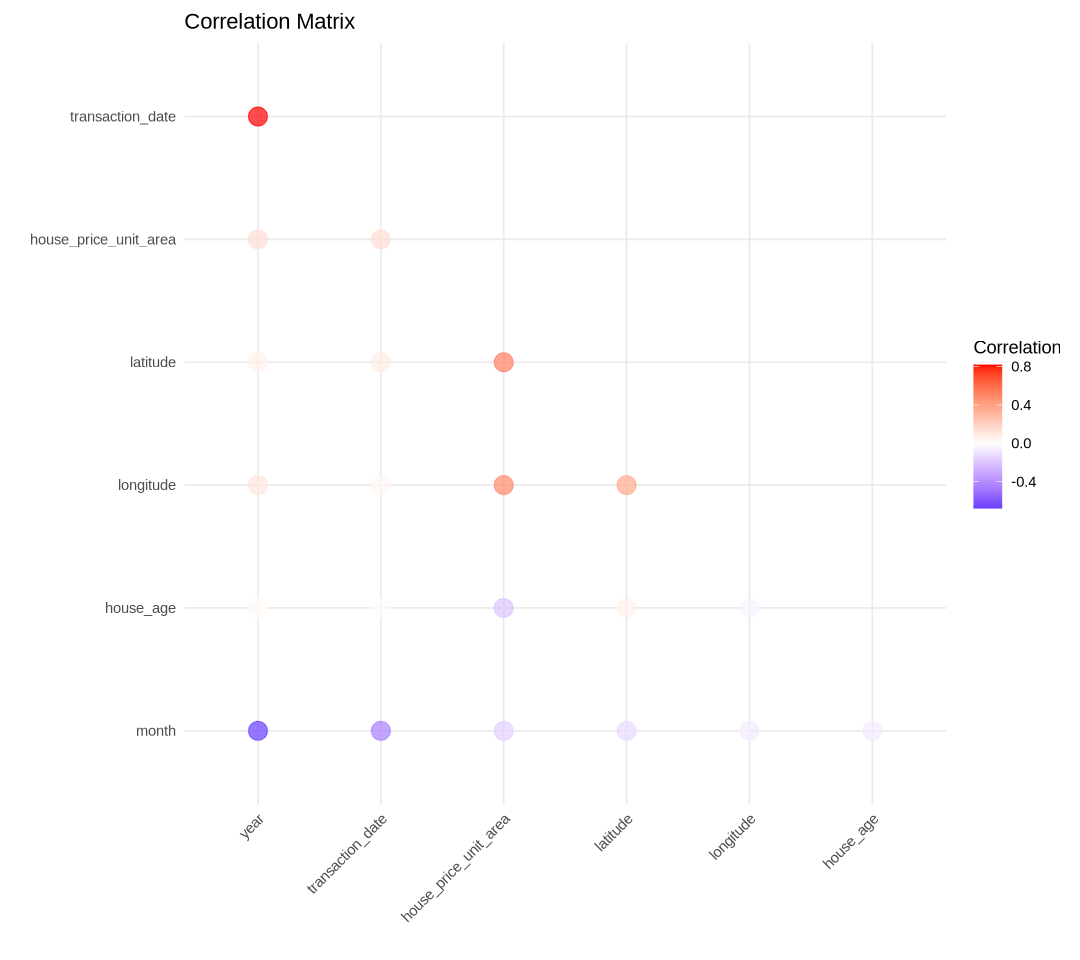

In [37]:
cor_matrix = re_val_train |>
  correlate() |>
  focus(-No, -dist_nearest_MRT, -num_convinient_store, mirror = TRUE) |>
  rearrange() |>
  shave()

fashion(cor_matrix)

cor_data <- stretch(cor_matrix)
cor_data_filtered <- cor_data |>
  filter(row_number() > match(x, unique(x))) |>
  filter(!is.na(r)) 

options(repr.plot.height = 8, repr.plot.width = 9)
cor_plot <- ggplot(cor_data_filtered, aes(x = factor(x, levels = unique(x)), 
                                          y = factor(y, levels = rev(unique(y))), 
                                          color = r)) +
  geom_point(alpha = 0.7, size = 5) + 
  scale_color_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "right",
  ) +
  labs(x = "", y = "", title = "Correlation Matrix", color = "Correlation") +
  coord_fixed() 
cor_plot

Here is a visualization of correlation but without our response variable distance. Similarly, we can conclude the general relationship and dependency between pairs of variables.

### Visualization 2: Boxplots of Continuous Variables

No id variables; using all as measure variables



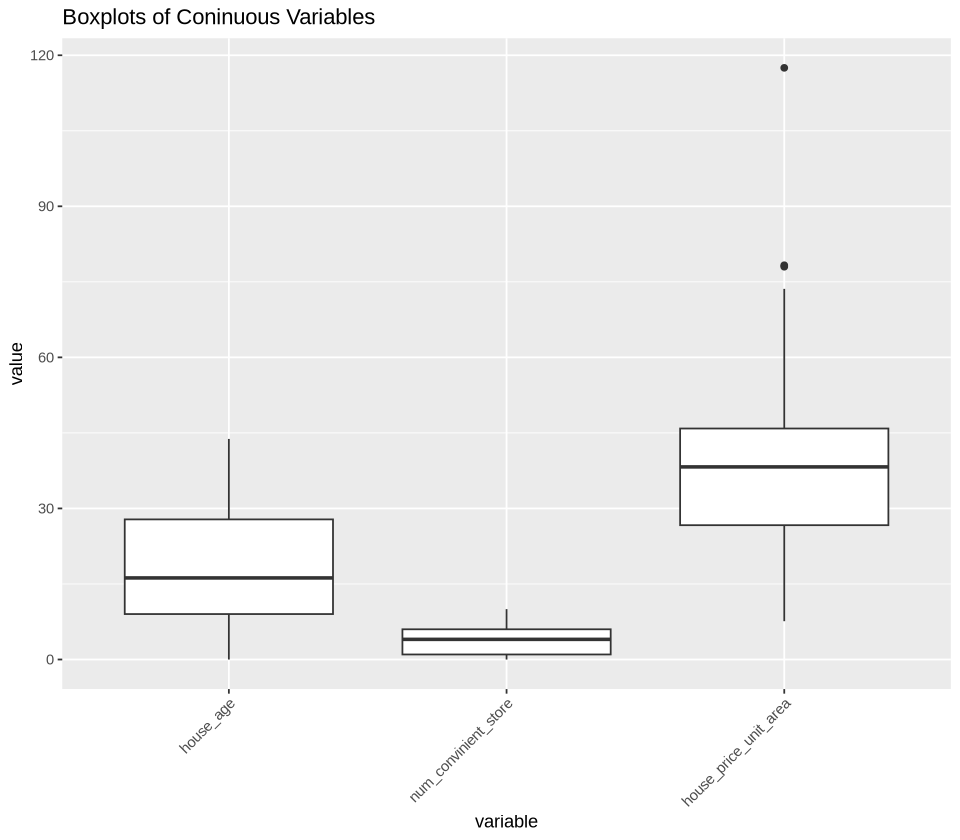

In [46]:
numeric_data <- re_val_train |>
  select(house_age, num_convinient_store,house_price_unit_area)

long_numeric_data <- reshape2::melt(numeric_data)

ggplot(long_numeric_data, aes(x = variable, y = value)) + 
  geom_boxplot() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Boxplots of Coninuous Variables")

The boxplot for continuous variables shows the distribution of data points and the presence of outliers. For example, we can see that there are two outliers in house price, which is reasonable because in reality there will always be some outliers when it comes to prices and especially in real estate. Therefore, we might need to be careful with these outliers when dealing with data. We might consider implementing trimming or winsorizing to remove or cap the outliers.

### Visualization 3: Response Variable Distribution Histogram

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


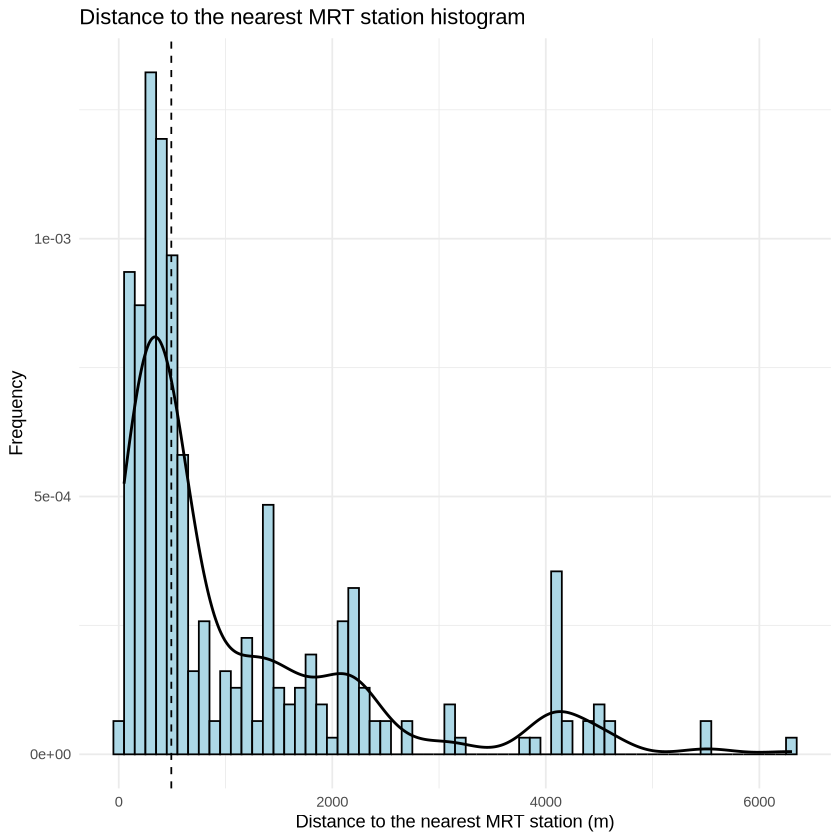

In [25]:
dist_hist = re_val_train |>
  ggplot(aes(x = dist_nearest_MRT)) +
  geom_histogram(aes(y = ..density..), binwidth = 100, fill = "lightblue",color = "black")+
  geom_density(alpha = 0.5, color = "black", linewidth = 0.8) +
  geom_vline(xintercept = median(re_val_train$dist_nearest_MRT), linetype = "dashed")+
  theme_minimal()+
  labs(x = "Distance to the nearest MRT station (m)", y = "Frequency")+
  ggtitle("Distance to the nearest MRT station histogram")
dist_hist

This histogram shows the distribution of our response variable, the distance to the nearet MRT station. The dashed line is at the median of the distance, cutting the data right at 50%. We can see that the distribution of the data is relatively right-skewed, with generally lower frequency to the right and larger frequency to the left. The mode happens to be on the left of the median value.

### Visualization 4: Predictor Variables vs. Response Variable Joint Plot

The joint plots below shows the scatter plot between every predictor and our response variable, as well as the marginal histogram. A detailed description to every predictor will not be given here, but the general idea is to get the shape and trend for each predictor variable, with respect to our predicting variable. For example, house price per unit area shows a weak negative retionship with our distancce, the data points are condensed at bottom and spread out at the top. Interestingly, both longitude and latitude shows a trend of "Nike" shape, where there's a weak, or even strong negative correlation at first, then at some point, some latitude and longitude, the distance starts to increase when predictors increase, and gives us a weak positive relationship.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



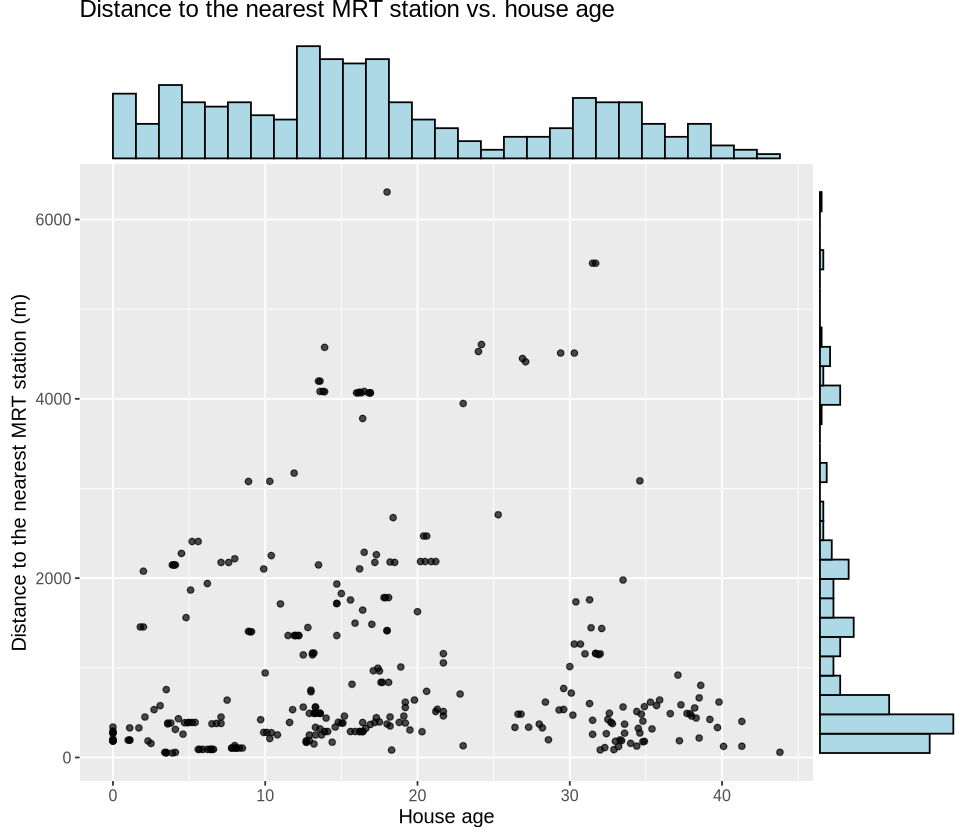

In [47]:
install.packages("ggExtra")
library(ggExtra)

options(repr.plot.height = 7, repr.plot.width = 8)
plot5_1 = ggplot(re_val_train, aes(x = house_age, y = dist_nearest_MRT)) +
  geom_point(alpha = 0.7) +
  labs(x = "House age", y = "Distance to the nearest MRT station (m)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Distance to the nearest MRT station vs. house age")
plot5_1 = ggMarginal(plot5_1, type = "histogram", fill = "lightblue")
plot5_1

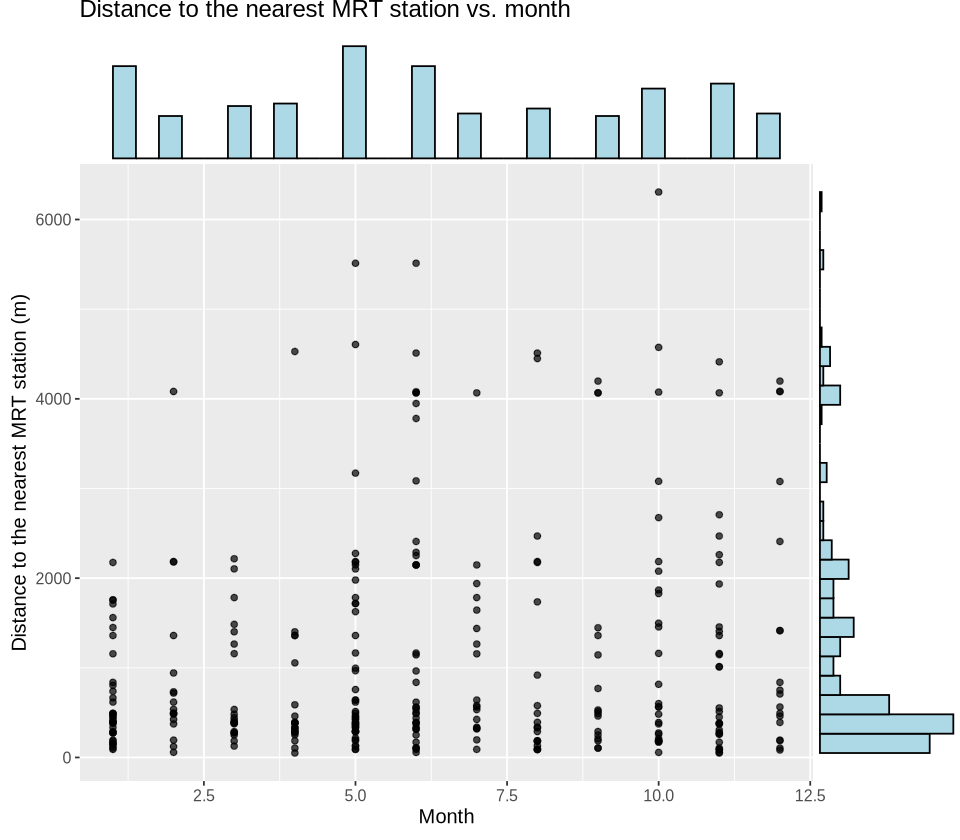

In [48]:
options(repr.plot.height = 7, repr.plot.width = 8)
plot5_2 = ggplot(re_val_train, aes(x = month, y = dist_nearest_MRT)) +
  geom_point(alpha = 0.7) +
  labs(x = "Month", y = "Distance to the nearest MRT station (m)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Distance to the nearest MRT station vs. month")
plot5_2 = ggMarginal(plot5_2, type = "histogram", fill = "lightblue")
plot5_2

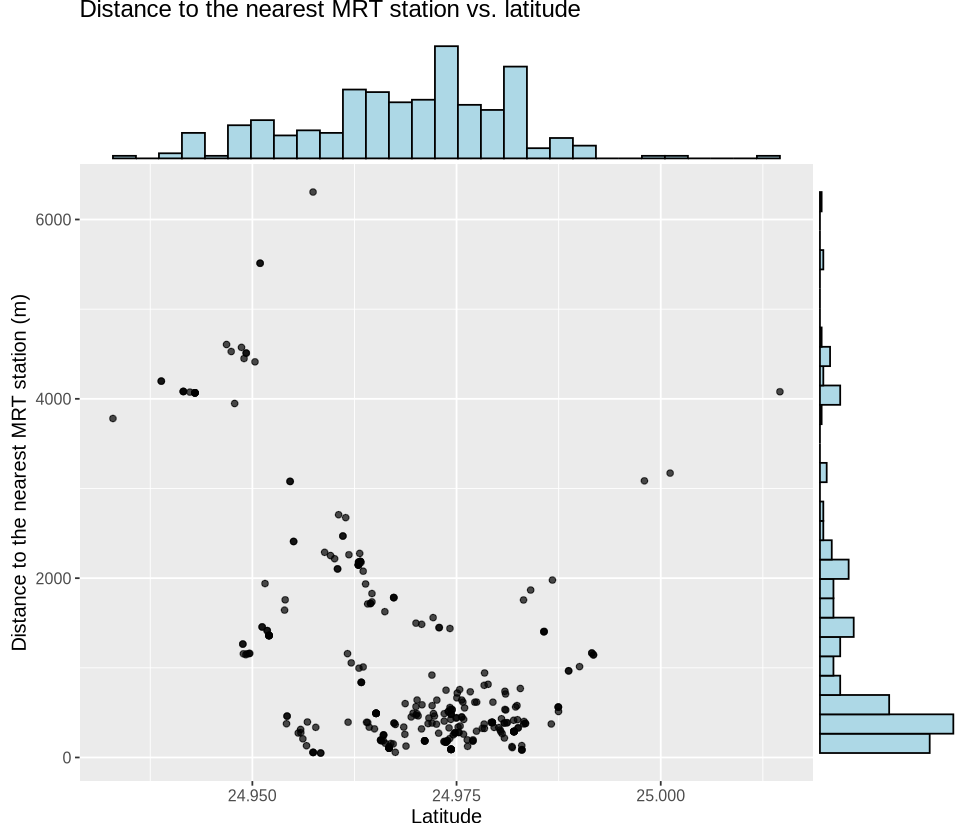

In [49]:
options(repr.plot.height = 7, repr.plot.width = 8)
plot5_3 = ggplot(re_val_train, aes(x = latitude, y = dist_nearest_MRT)) +
  geom_point(alpha = 0.7) +
  labs(x = "Latitude", y = "Distance to the nearest MRT station (m)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Distance to the nearest MRT station vs. latitude")
plot5_3 = ggMarginal(plot5_3, type = "histogram", fill = "lightblue")
plot5_3


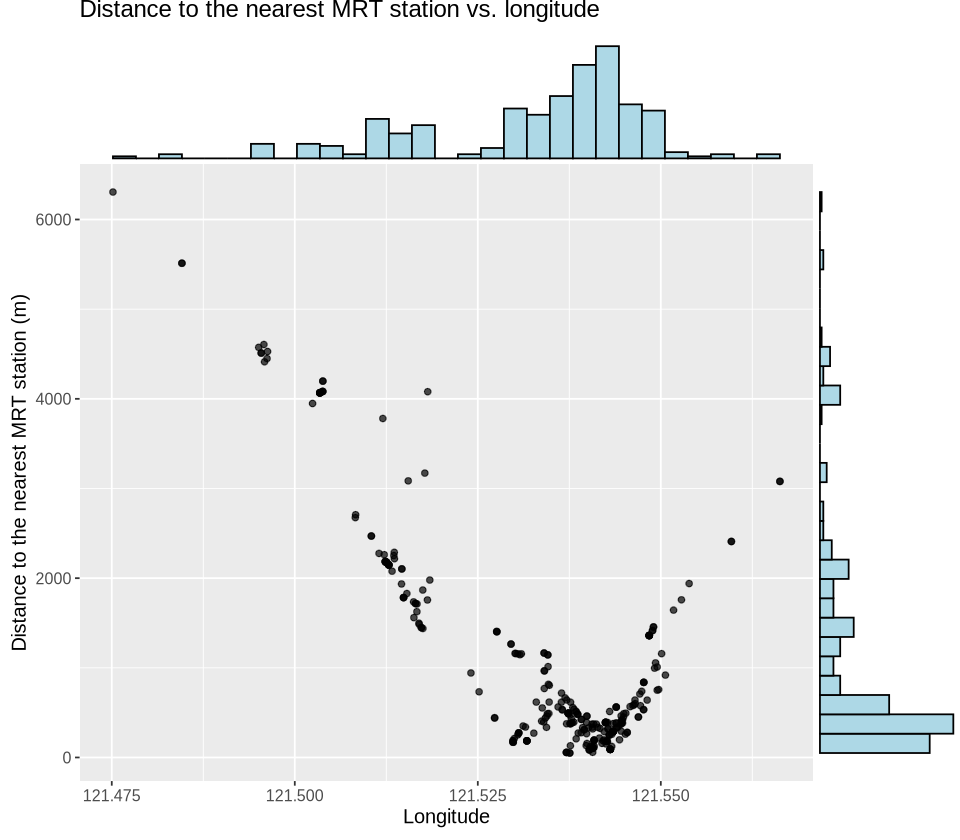

In [50]:
options(repr.plot.height = 7, repr.plot.width = 8)
plot5_4 = ggplot(re_val_train, aes(x = longitude, y = dist_nearest_MRT)) +
  geom_point(alpha = 0.7) +
  labs(x = "Longitude", y = "Distance to the nearest MRT station (m)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Distance to the nearest MRT station vs. longitude")
plot5_4 = ggMarginal(plot5_4, type = "histogram", fill = "lightblue")
plot5_4

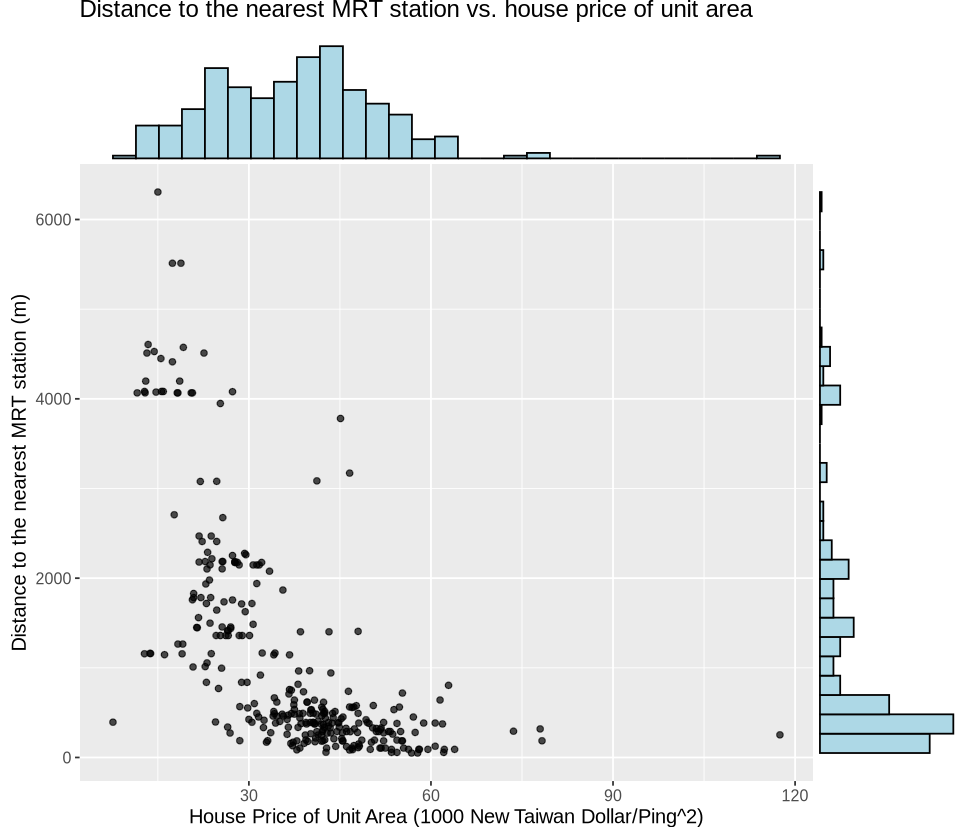

In [51]:
options(repr.plot.height = 7, repr.plot.width = 8)
plot5_5 = ggplot(re_val_train, aes(x = house_price_unit_area, y = dist_nearest_MRT)) +
  geom_point(alpha = 0.7) +
  labs(x = "House Price of Unit Area (1000 New Taiwan Dollar/Ping^2)", y = "Distance to the nearest MRT station (m)") +
  theme(text = element_text(size = 12)) +
  ggtitle("Distance to the nearest MRT station vs. house price of unit area")
plot5_5 = ggMarginal(plot5_5, type = "histogram", fill = "lightblue") 
plot5_5


## Methods

Through regression, we are predicting the distance to the nearest MRT a buyer would expect to find, based on a multitude of variables.
 The variables used in the data set are as follows
1. Transaction Date (YYYY. #M/121)
1. House age (YYYY)
1. Distance to the Nearest MRT Station (Meter)
1. Latitude (Degree)
1. Longitude (Degree)
1. House price of unit area (1000 New Taiwan Dollar/Ping2)
<br>

All columns are associated with a numeric value. There are 414 rows and no missing values in the data set.
To clean the data, we simplified the column names and separated years and months into different columns for better navigation and make analysis less tedious. Then we used initial_split(data, prop = 0.75, strata = distance_to_nearst_mrt_station), which split 75% of our data into a training set, which we named re_val_training, and 25% into a testing data, re_val_test.  We then created a spec engine to train our data using nearest_neighbor and created a recipe using our variables. We then made a workflow for our data, fitting it to the training data. Afterwards, we tune the grid, collect metrics, and filter for “rmse” to find the ideal K value. We then use our workflow data to predict our data, plot it on a scattergraph, and use a fitted line to predict the distance to the nearest MRT station.

## Expectations, Outcomes, and Significance

We expect that the transaction date and the real estate units' longitude and latitude will correlate with the distance to the MRT station. We also think that houses near the MRT stations will cost more. The idea here is that public transportation provides opportunities. By granting an individual that lives close to a station the freedom and flexibility to live how they choose, we belive it would increase housing prices. This is because MRTs are often affordable, helps connect to work or nightlife easily, helps avoid parking hassles, helps avoiding traffic, and etc.
<br>

The results can help plan future developments. If houses near MRT stations cost more, it could influence property prices and where people choose to live. This could also be used by people looking to purchase properties to look for the best prices for houses based on our data analysis.
<br>

Next steps involve making models to predict MRT distance using dates, house age, location, and prices. We'll explore how house age connects to MRT distance and see if specific areas have different property values. We'll also check how changes in transportation might affect property values and if MRT accessibility is fair for everyone.

## Bibliography

[1] Wikipedia contributors. "Taipei Metro." Wikipedia, The Free Encyclopedia. Last modified April 2023. https://en.wikipedia.org/wiki/Taipei_Metro.

[2] 
"Taipei MRT Rapid Transit Subway (台北捷運)." Guide to Taipei.com. Accessed March 9, 2024. https://guidetotaipei.com/visit/taipei-mrt-rapid-transit-subway-台北捷


[3] MetaSUB. (n.d.). City Profiles: Taipei, Taiwan. Retrieved March 9, 2024, from https://metasub.org/city-profiles/taipei-taiwan/

  